In [1]:
from keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [2]:
TRAIN_DIR = '/content/drive/MyDrive/Dlpro/train'
TEST_DIR = '/content/drive/MyDrive/Dlpro/validation'

In [3]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [4]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

disgust completed
happy completed
angry completed
sad completed
surprise completed
fear completed
neutral completed


In [5]:
print(train)

                                                  image     label
0      /content/drive/MyDrive/Dlpro/train/sad/11945.jpg       sad
1      /content/drive/MyDrive/Dlpro/train/sad/12083.jpg       sad
2      /content/drive/MyDrive/Dlpro/train/sad/11996.jpg       sad
3      /content/drive/MyDrive/Dlpro/train/sad/12057.jpg       sad
4      /content/drive/MyDrive/Dlpro/train/sad/12006.jpg       sad
...                                                 ...       ...
4522  /content/drive/MyDrive/Dlpro/train/surprise/12...  surprise
4523  /content/drive/MyDrive/Dlpro/train/surprise/12...  surprise
4524  /content/drive/MyDrive/Dlpro/train/surprise/12...  surprise
4525  /content/drive/MyDrive/Dlpro/train/surprise/12...  surprise
4526  /content/drive/MyDrive/Dlpro/train/surprise/12...  surprise

[4527 rows x 2 columns]


In [6]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

surprise completed
sad completed
neutral completed
angry completed
happy completed
fear completed
disgust completed


In [7]:
print(test)
print(test['image'])

Empty DataFrame
Columns: [image, label]
Index: []
Series([], Name: image, dtype: float64)


In [8]:
from tqdm.notebook import tqdm

In [9]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [10]:
train_features = extract_features(train['image'])

  0%|          | 0/4527 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/keras/src/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


In [11]:
test_features = extract_features(test['image'])

0it [00:00, ?it/s]

In [12]:
x_train = train_features/255.0
x_test = test_features/255.0

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [15]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [16]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [17]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [18]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )

In [19]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test))

Epoch 1/100
36/36 [==============================] - 15s 70ms/step - loss: 0.7356 - accuracy: 0.6587
Epoch 2/100
36/36 [==============================] - 2s 51ms/step - loss: 0.5982 - accuracy: 0.7069
Epoch 3/100
36/36 [==============================] - 2s 52ms/step - loss: 0.5868 - accuracy: 0.7080
Epoch 4/100
36/36 [==============================] - 2s 53ms/step - loss: 0.5823 - accuracy: 0.7082
Epoch 5/100
36/36 [==============================] - 2s 54ms/step - loss: 0.5555 - accuracy: 0.7265
Epoch 6/100
36/36 [==============================] - 2s 52ms/step - loss: 0.4965 - accuracy: 0.7486
Epoch 7/100
36/36 [==============================] - 2s 51ms/step - loss: 0.4512 - accuracy: 0.7913
Epoch 8/100
36/36 [==============================] - 2s 51ms/step - loss: 0.3828 - accuracy: 0.8233
Epoch 9/100
36/36 [==============================] - 2s 52ms/step - loss: 0.3497 - accuracy: 0.8511
Epoch 10/100
36/36 [==============================] - 2s 51ms/step - loss: 0.3176 - accuracy: 0.857

In [20]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [32]:
json_file = open("/content/drive/MyDrive/Dlpro/facialemotionmodel.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("/content/drive/MyDrive/Dlpro/facialemotionmodel.h5")

In [33]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [34]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 [==============================] - 0s 152ms/step
model prediction is  sad


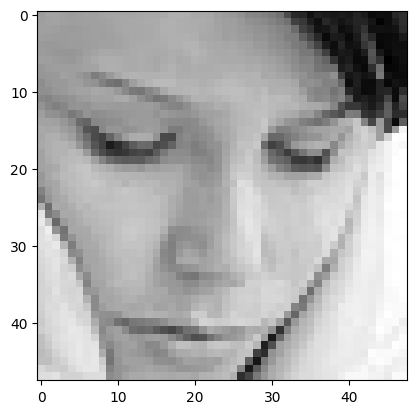

In [36]:
image = '/content/drive/MyDrive/Dlpro/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 [==============================] - 0s 21ms/step
model prediction is  fear


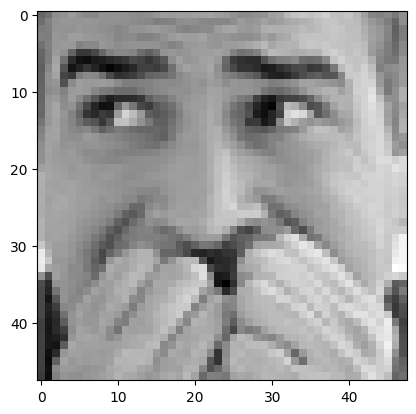

In [37]:
image = '/content/drive/MyDrive/190.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 [==============================] - 0s 18ms/step
model prediction is  disgust


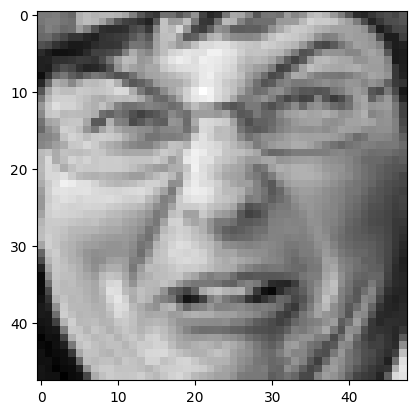

In [38]:
image = '/content/drive/MyDrive/299.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 [==============================] - 0s 28ms/step
model prediction is  happy


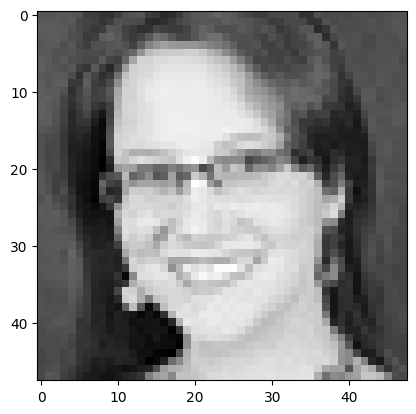

In [39]:
image = '/content/drive/MyDrive/7.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 [==============================] - 0s 114ms/step
model prediction is  surprise


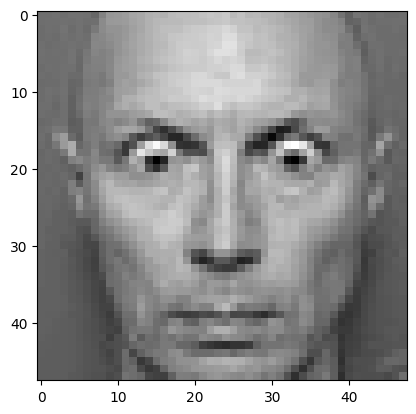

In [40]:
image = '/content/drive/MyDrive/15.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')